In [14]:
from sklearn.datasets import load_wine
raw_wine = load_wine()

In [15]:
X = raw_wine.data
y = raw_wine.target

In [16]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=1)

In [17]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

In [29]:
from sklearn.decomposition import KernelPCA
k_pca = KernelPCA(n_components=2, kernel='poly')
k_pca.fit(X_tn_std)
X_tn_kpca = k_pca.transform(X_tn_std)
X_te_kpca = k_pca.transform(X_te_std)

In [30]:
# 차원축소 전후 데이터 차원 비교
print(X_tn_std.shape)
print(X_tn_kpca.shape)

(133, 13)
(133, 2)


In [31]:
# 고유값
print(k_pca.lambdas_)
# 고유 벡터
print(k_pca.alphas_)

[193.89824561 118.0368972 ]
[[ 0.07266242  0.00456251]
 [ 0.0469712  -0.04020348]
 [ 0.08698324  0.07012786]
 [ 0.19996777  0.218482  ]
 [ 0.14558241  0.12759024]
 [-0.0316937  -0.0955557 ]
 [-0.10921606  0.09183472]
 [-0.11306065  0.07491762]
 [ 0.08725253  0.05204947]
 [-0.02421116 -0.09637237]
 [ 0.10518354  0.00629214]
 [ 0.08056162  0.03107663]
 [ 0.03371273 -0.12190244]
 [-0.10603515  0.03252174]
 [ 0.07314539 -0.07636543]
 [-0.00830065 -0.06671645]
 [ 0.08166126  0.0683314 ]
 [-0.12106496  0.08116178]
 [-0.00440492 -0.13286099]
 [-0.098436    0.01206587]
 [ 0.16936111  0.14411655]
 [-0.00112801 -0.10236899]
 [ 0.05046673  0.05090575]
 [ 0.02312764 -0.11672988]
 [ 0.05288299  0.01634404]
 [-0.14390684  0.07755703]
 [-0.1116687   0.10213843]
 [-0.09004075  0.07111502]
 [-0.13169412  0.12006775]
 [-0.06341878 -0.03931811]
 [-0.01177083 -0.10981527]
 [ 0.03619517 -0.01828061]
 [-0.156624    0.11828334]
 [ 0.09838309  0.05224656]
 [-0.03607944 -0.04304917]
 [-0.08718829  0.03003902]


In [32]:
import pandas as pd
kpca_columns = ['kpca_comp1', 'kpca_comp2']
X_tn_kpca_df = pd.DataFrame(X_tn_kpca,
                            columns=kpca_columns)
X_tn_kpca_df['target'] = y_tn
X_tn_kpca_df.head()

,kpca_comp1,kpca_comp2,target
0,1.011805,0.049569,0
1,0.654061,-0.436790,1
2,1.211219,0.761903,0
3,2.784498,2.373693,0
4,2.027196,1.386201,0


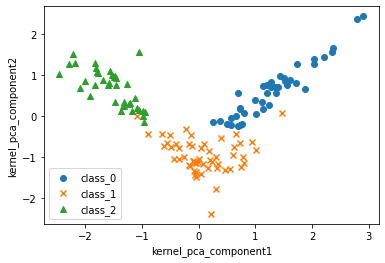

In [33]:
import matplotlib.pyplot as plt
df = X_tn_kpca_df
markers = ['o', 'x', '^']

for i, mark in enumerate(markers):
    X_i = df[df['target'] == i]
    target_i = raw_wine.target_names[i]
    X1 = X_i['kpca_comp1']
    X2 = X_i['kpca_comp2']
    plt.scatter(X1, X2,
                marker=mark,
                label=target_i)

plt.xlabel('kernel_pca_component1')
plt.ylabel('kernel_pca_component2')
plt.legend()
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf_rf_kpca = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf_kpca.fit(X_tn_kpca, y_tn)


RandomForestClassifier(max_depth=2, random_state=0)

In [35]:
pred_rf_kpca = clf_rf_kpca.predict(X_te_kpca)

In [36]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_rf_kpca)
accuracy

0.9555555555555556